In [16]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.decomposition import PCA
import matplotlib.colors as colors
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.svm import SVC



In [17]:
df = pd.read_csv("CellDNA.csv", header= None)


In [18]:
df.columns =['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','x10','x11','x12','x13']

In [19]:
df.loc[:, 'x13'] = np.where(df.x13>0, 1, 0)

In [20]:
df


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,222,31.189189,40.342342,35.579087,8.883917,0.968325,-80.113673,222,1,16.812471,0.816176,0.578125,78.591,0
1,73,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73,1,9.640876,0.858824,0.608333,39.217,0
2,256,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256,1,18.054067,0.752941,0.562637,89.111,0
3,126,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126,1,12.666025,0.881119,0.646154,43.832,0
4,225,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225,1,16.925688,0.728155,0.252525,90.072,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,216,738.527778,216.449074,38.229761,9.556174,0.968254,12.847813,216,1,16.583719,0.640950,0.397059,98.589,0
1213,328,748.896341,47.664634,63.138991,9.101974,0.989555,57.919494,328,1,20.435816,0.607407,0.205257,131.431,1
1214,97,761.690722,207.288660,22.751513,8.230351,0.932275,-24.674618,97,1,11.113246,0.591463,0.384921,67.427,0
1215,223,770.654708,235.502242,53.491654,8.643053,0.986860,73.244715,223,1,16.850294,0.557500,0.252834,112.656,0


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','x10','x11','x12']] = scaler.fit_transform(df[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','x10','x11','x12']])

In [22]:
numeric_cols = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8','x9','x10','x11','x12']
scaler = StandardScaler()
scaler.fit(df[numeric_cols])
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[ 0.15952762, -1.80200559, -1.20813407, ...,  0.34511514,
         0.65289142, -0.00691284],
       [-0.93921222, -1.80987674,  0.42436331, ...,  0.7072868 ,
         0.84374979, -0.81411281],
       [ 0.41024678, -1.67379037,  0.55538528, ..., -0.19189804,
         0.55503945,  0.20875597],
       ...,
       [-0.76223399,  1.58818067, -0.02859014, ..., -1.56321582,
        -0.56778731, -0.23578419],
       [ 0.16690172,  1.62978166,  0.17075035, ..., -1.85164337,
        -1.40231699,  0.69144818],
       [-0.83597492,  1.60332534,  0.38379311, ...,  1.53291195,
         1.69830929, -0.95601961]])

In [23]:
df


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.159528,-1.802006,-1.208134,0.114420,-0.135689,0.538311,-1.587426,0.135833,0.233292,0.329626,0.345115,0.652891,-0.006913,0
1,-0.939212,-1.809877,0.424363,-0.933511,-0.817247,0.019258,1.500586,-0.909580,0.233292,-1.221986,0.707287,0.843750,-0.814113,0
2,0.410247,-1.673790,0.555385,0.200447,0.134019,0.501621,1.684134,0.374384,0.233292,0.598252,-0.191898,0.555039,0.208756,0
3,-0.548385,-1.617137,1.879947,-1.059096,0.939523,-6.206504,1.253012,-0.537722,0.233292,-0.567479,0.896626,1.082702,-0.719501,0
4,0.181650,-1.525316,2.335905,0.578476,-0.417798,0.681969,-1.048779,0.156881,0.233292,0.354121,-0.402387,-1.404271,0.228457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,0.115283,1.480684,0.036132,0.252878,0.049329,0.537678,0.250896,0.093736,0.233292,0.280134,-1.142965,-0.491097,0.403063,0
1213,0.941181,1.528803,-1.156399,1.554010,-0.075675,0.729753,1.142193,0.879550,0.233292,1.113556,-1.427815,-1.702917,1.076351,1
1214,-0.762234,1.588181,-0.028590,-0.555628,-0.315562,0.213238,-0.491114,-0.741192,0.233292,-0.903431,-1.563216,-0.567787,-0.235784,0
1215,0.166902,1.629782,0.170750,1.050082,-0.201979,0.705453,1.445251,0.142849,0.233292,0.337809,-1.851643,-1.402317,0.691448,0


In [24]:
x = df.drop('x13', axis = 1).values
y = df['x13']
y = y.astype(int)

print(x.shape)
print(y.shape)

(1217, 13)
(1217,)


# check distribution of target_class column

In [25]:
df['x13'].value_counts()


0    1017
1     200
Name: x13, dtype: int64

In [26]:
df['x13'].value_counts()/np.float(len(df))


0    0.835661
1    0.164339
Name: x13, dtype: float64

In [27]:
round(df.describe(),2)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
count,1217.00,1217.00,1217.00,1217.00,1217.00,1217.00,1217.00,1217.00,1217.00,1217.00,1217.00,1217.00,1217.00,1217.00
mean,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.16
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.37
min,-0.96,-1.82,-1.30,-1.21,-1.73,-6.23,-1.77,-0.93,-12.80,-1.27,-4.37,-2.28,-1.04,0.00
25%,-0.69,-0.82,-0.81,-0.76,-0.51,-0.21,-0.82,-0.66,0.23,-0.78,-0.62,-0.77,-0.68,0.00
50%,-0.30,-0.02,-0.19,-0.29,-0.25,0.37,-0.01,-0.29,0.23,-0.22,0.12,-0.00,-0.26,0.00
75%,0.38,0.89,0.58,0.58,0.12,0.63,0.81,0.35,0.23,0.57,0.77,0.74,0.39,0.00
max,6.55,1.64,2.57,6.37,9.39,0.81,1.77,6.71,0.23,4.75,1.91,2.72,8.50,1.00


In [28]:
df.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13      int64
dtype: object

%CREATE SVM MODEL classifier ML ALGORITHM






In [29]:
clf_svm = SVC(random_state=42)
clf_svm.fit(x,y)

SVC(random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


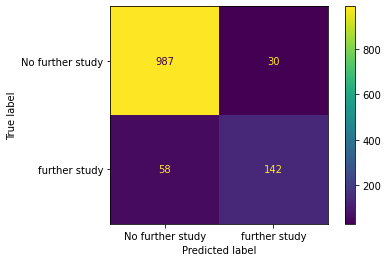

In [31]:
plot_confusion_matrix(clf_svm,
                      x,
                      y,
                      display_labels=['No further study', 'further study'])

In the confusion matrix, we see that of the 987 + 58 = 1045 that did not interesting in further study, 987 were correctly classified. And of the 30 + 142 = 172 that have interesting in further study, 142 were correctly classified. So the support vector machine did pretty well without any optimization. That said, it is possible that we can improve predictions using Cross Validation to optimize the parameters.

In [32]:
param_grid = [
              {'C':[1,10,100,1000],
               'gamma':[0.001,0.0001],
               'kernel':['rbf']}
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    verbose=1
)
optimal_params.fit(x, y)
optimal_params.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


% Finding the best value of gamma, regularization parameter "C" (box constraint) and rbf kernel scale to improve the accuracy with the dataset. 

% ATTEMPT 1 C=1, GAMMA =0.1

In [69]:
clf_svm = SVC(random_state=42, C=1, gamma=0.1,kernel='rbf')
clf_svm.fit(x, y)

SVC(C=1, gamma=0.1, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


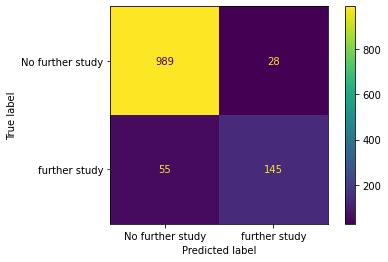

In [70]:
plot_confusion_matrix(clf_svm,
                      x,
                      y,
                      display_labels=['No further study', 'further study'])

% I see that the optimized Support Vector Machine is better at classifying Bacteria for the further study than the preliminary support vector machine.

In [71]:
clf_svm = SVC(random_state=42, C=10, gamma=0.1,kernel='rbf')
clf_svm.fit(x, y)

SVC(C=10, gamma=0.1, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


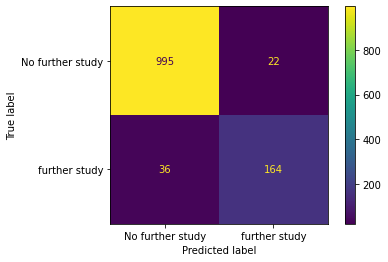

In [72]:
plot_confusion_matrix(clf_svm,
                      x,
                      y,
                      display_labels=['No further study', 'further study'])

% In progress showing better at classifying Bacteria for the further study than second attempt.

In [75]:
clf_svm = SVC(random_state=42, C=10, gamma=1,kernel='rbf')
clf_svm.fit(x, y)

SVC(C=10, gamma=1, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


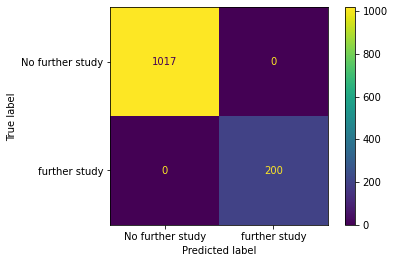

In [94]:
# instantiate classifier with rbf kernel and C=10
clf= svm.SVC(kernel = 'rbf', C = 10,gamma=1,probability=True)
# fit classifier to predictors & target set
clf.fit(x,y)
# of support vectors in EACH class
print(clf.n_support_) 
# indices of support vectors
print(clf.support_)  
# coefficients in ”dual” form
print(clf.dual_coef_)  
# make predictions on predictors set
y_pred=clf.predict(x)
yhat = clf.predict_proba(x) 
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=10 : {0:0.4f}'. format(accuracy_score(y, y_pred)))


[681 188]
[   0    1    3    5    6    7    8    9   10   11   12   13   16   18
   19   20   21   22   23   24   28   29   32   36   37   38   40   41
   42   46   47   48   49   50   52   53   60   61   64   66   67   68
   69   70   71   72   73   76   77   78   79   80   81   82   83   87
   88   91   93   94   95   96   99  100  101  102  103  104  105  106
  107  108  109  110  111  114  115  116  120  122  125  126  127  128
  130  131  133  134  135  136  138  139  141  142  143  147  148  149
  151  152  154  158  160  161  162  165  166  168  169  170  173  176
  177  180  181  182  184  185  191  192  193  194  198  230  232  233
  235  236  237  238  239  240  242  243  246  247  248  249  254  255
  258  261  262  263  264  265  267  268  270  271  272  273  274  276
  277  278  279  281  284  285  286  287  290  291  292  293  294  295
  296  299  300  301  302  303  304  305  306  309  311  312  313  316
  318  319  320  323  325  330  331  334  335  336  337  340  342  

In [95]:
print(y.shape, y.size)
print(y_pred)
print(yhat)

(1217,) 1217
[0 0 0 ... 0 0 0]
[[0.95674689 0.04325311]
 [0.95673417 0.04326583]
 [0.97701012 0.02298988]
 ...
 [0.95680701 0.04319299]
 [0.95679213 0.04320787]
 [0.95676655 0.04323345]]


In [97]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 1.0000


% EXPERIMENT FOR ROC CURVE PLOT * EACH CLASS 

In [130]:
clf_svm = SVC(random_state=42, C=10, gamma=0.1,kernel='rbf')
clf_svm.fit(x,y)

SVC(C=10, gamma=0.1, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


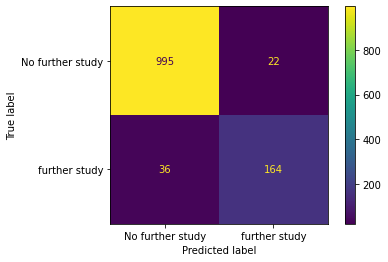

In [131]:
plot_confusion_matrix(clf_svm,
                      x,
                      y,
                      display_labels=['No further study', 'further study'])

In [137]:
# instantiate classifier with rbf kernel and C=10
clf= svm.SVC(probability=True, C=10, gamma=0.1,kernel='rbf')
# fit classifier to predictors & target set
clf.fit(x,y)
# of support vectors in EACH class
print(clf.n_support_) 
# indices of support vectors
print(clf.support_)  
# coefficients in ”dual” form
print(clf.dual_coef_)  
# make predictions on predictors set
y_pred=clf.predict(x)
yhat = clf.predict_proba(x) 
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=10 : {0:0.4f}'. format(accuracy_score(y, y_pred)))


[163 117]
[   3   12   28   29   51   52   53   68   70   76   77   86  100  102
  108  130  135  142  143  166  176  188  193  261  265  271  274  277
  278  291  299  300  303  304  305  309  312  313  318  325  335  342
  361  363  382  389  405  416  471  485  488  492  514  515  527  528
  530  532  533  545  562  563  564  570  575  576  580  586  589  590
  601  606  608  609  611  621  672  682  694  706  729  743  744  754
  818  831  832  852  872  885  892  907  921  927  941  945  964  971
  972  987  994 1000 1011 1013 1022 1024 1027 1028 1029 1033 1034 1040
 1044 1049 1051 1056 1057 1063 1064 1066 1070 1072 1074 1077 1081 1083
 1085 1090 1091 1093 1097 1102 1106 1108 1112 1113 1114 1117 1124 1125
 1126 1128 1129 1130 1132 1133 1134 1136 1138 1141 1142 1143 1144 1157
 1173 1179 1184 1187 1188 1190 1203 1207 1215    4   17   31   35   43
   56   74   98  123  124  144  163  164  167  183  203  214  219  220
  221  225  228  229  234  245  250  251  252  256  259  260  289  

In [138]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, auc, accuracy_score

# class 0
fpr_0, tpr_0, _ = roc_curve(y, yhat[:, 0],pos_label=0)
roc_auc_0 = roc_auc_score(y, yhat[:, 0])



roc_auc_0:  0.021283185840707968


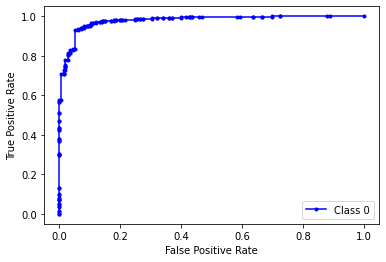

In [139]:
# plot ROC curves
print('roc_auc_0: ', roc_auc_0)

plt.plot(fpr_0, tpr_0, marker='.', label='Class 0', color='b')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [140]:
# class 1
fpr_1, tpr_1, _ = roc_curve(y, yhat[:, 1])
roc_auc_1 = roc_auc_score(y, yhat[:, 1])
print('roc_auc_1: ', roc_auc_1, '\n')

roc_auc_1:  0.9787168141592921 



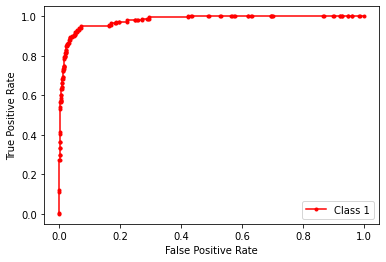

In [141]:
plt.plot(fpr_1, tpr_1, marker='.', label='Class 1', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()